# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [66]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [4]:
# Your code here
data = pd.read_csv('./data/data_all.csv')

In [17]:
data.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
imagenes=data.e.unique()
list_imagenes=imagenes.tolist()
list_imagenes.sort()
print(list_imagenes)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0]


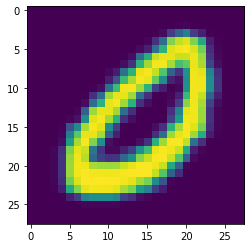

In [23]:
X=data.drop(columns="e")
y=data.e

impresion=X.iloc[1,:].to_numpy().reshape(28,28)
plt.imshow(impresion);

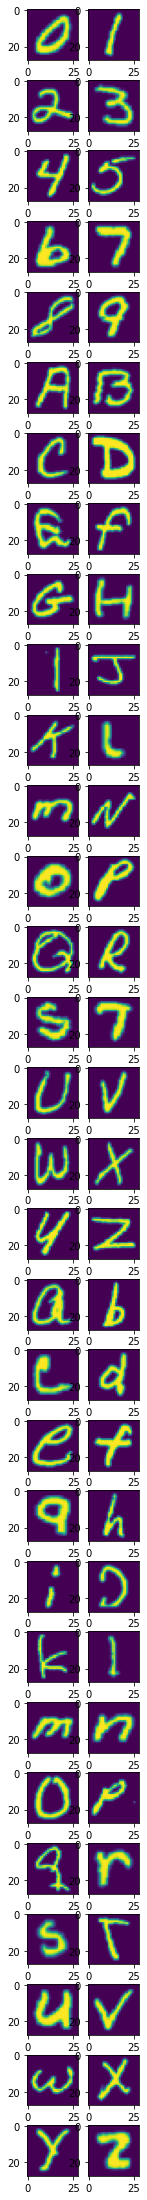

In [26]:
fig=plt.figure(figsize=(2,40))
columns=2
rows=31
for i in range(1,columns*rows+1):
    img=data[data.e==(i-1)].iloc[0,1:].to_numpy().reshape(28,28)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()



* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [27]:
# Your code here
X_up=data[(data.e>=10)&(data.e<=36)].drop(columns="e")
y_up=data[(data.e>=10)&(data.e<=36)].e

X_up_train, X_up_test, y_up_train, y_up_test = train_test_split(X_up,y_up,test_size=0.2)

In [32]:
#Support Vector Classification
SVC=SVC()

In [33]:
SVC.fit(X_up_train,y_up_train)
y_up_pred=SVC.predict(X_up_test)


In [34]:
precision_score(y_up_test,y_up_pred,average=None)

array([0.87755102, 0.88636364, 0.96978852, 0.8496732 , 0.94545455,
       0.87774295, 0.88157895, 0.92708333, 0.92810458, 0.89655172,
       0.921875  , 0.93478261, 0.93877551, 0.89492754, 0.93597206,
       0.9252669 , 0.92063492, 0.86075949, 0.97234352, 0.96575342,
       0.91044776, 0.90909091, 0.98734177, 0.90909091, 0.86705202,
       0.97222222, 0.89164087])

In [35]:
recall_score(y_up_test,y_up_pred,average=None)

array([0.95982143, 0.82394366, 0.93586006, 0.76923077, 0.86187845,
       0.92715232, 0.82716049, 0.79464286, 0.96818182, 0.86666667,
       0.78666667, 0.93989071, 0.97183099, 0.93560606, 0.96750903,
       0.94890511, 0.71604938, 0.85534591, 0.98091043, 0.97577855,
       0.96315789, 0.84415584, 0.9122807 , 0.85365854, 0.87719298,
       0.85365854, 0.89164087])

In [36]:
f1_score(y_up_test,y_up_pred,average=None)

array([0.91684435, 0.8540146 , 0.95252226, 0.80745342, 0.9017341 ,
       0.90177134, 0.85350318, 0.85576923, 0.94771969, 0.88135593,
       0.84892086, 0.9373297 , 0.9550173 , 0.91481481, 0.95147929,
       0.93693694, 0.80555556, 0.85804416, 0.97660819, 0.9707401 ,
       0.93606138, 0.87542088, 0.94832827, 0.88050314, 0.87209302,
       0.90909091, 0.89164087])

In [37]:
SVC.score(X=X_up_test,y=y_up_test)

0.9240678993634435

In [38]:
#Decision Tree Classifier
DTC=DecisionTreeClassifier()
DTC.fit(X_up_train, y_up_train)

DecisionTreeClassifier()

In [44]:
y_up_pred=DTC.predict(X_up_test)

In [45]:
precision_score(y_up_test,y_up_pred,average=None)

array([0.64102564, 0.50833333, 0.73789174, 0.48466258, 0.62130178,
       0.63694268, 0.5125    , 0.47524752, 0.8373102 , 0.46902655,
       0.51428571, 0.76963351, 0.77083333, 0.63194444, 0.83585565,
       0.74100719, 0.484375  , 0.46625767, 0.84241532, 0.83333333,
       0.71046229, 0.66233766, 0.70588235, 0.63768116, 0.65294118,
       0.56521739, 0.62913907])

In [46]:
recall_score(y_up_test,y_up_pred, average=None)

array([0.55803571, 0.42957746, 0.75510204, 0.46745562, 0.5801105 ,
       0.66225166, 0.50617284, 0.42857143, 0.87727273, 0.44166667,
       0.48      , 0.80327869, 0.78169014, 0.68939394, 0.86401925,
       0.75182482, 0.38271605, 0.47798742, 0.83994126, 0.8650519 ,
       0.76842105, 0.66233766, 0.63157895, 0.53658537, 0.64912281,
       0.63414634, 0.58823529])

In [47]:
f1_score(y_up_test,y_up_pred,average=None)

array([0.59665871, 0.46564885, 0.74639769, 0.47590361, 0.6       ,
       0.64935065, 0.50931677, 0.45070423, 0.85682575, 0.45493562,
       0.49655172, 0.78609626, 0.77622378, 0.65942029, 0.84970414,
       0.74637681, 0.42758621, 0.47204969, 0.84117647, 0.84889643,
       0.73830594, 0.66233766, 0.66666667, 0.58278146, 0.65102639,
       0.59770115, 0.608     ])

In [48]:
DTC.score(X=X_up_test,y=y_up_test)

0.7117308275234919

In [49]:
#Random Forest Classifier
RFC=RandomForestClassifier()
RFC.fit(X_up_train, y_up_train)

RandomForestClassifier()

In [50]:
y_up_pred=RFC.predict(X_up_test)
precision_score(y_up_test,y_up_pred,average=None)

array([0.81422925, 0.91150442, 0.92463768, 0.83211679, 0.92903226,
       0.85093168, 0.92647059, 0.9375    , 0.92173913, 0.87850467,
       0.890625  , 0.95480226, 0.90666667, 0.83448276, 0.87908497,
       0.92114695, 0.97727273, 0.81632653, 0.93484419, 0.93939394,
       0.88972431, 0.90070922, 0.96710526, 0.91025641, 0.87719298,
       0.98611111, 0.85758514])

In [52]:
recall_score(y_up_test,y_up_pred,average=None)

array([0.91964286, 0.72535211, 0.93002915, 0.67455621, 0.79558011,
       0.90728477, 0.77777778, 0.66964286, 0.96363636, 0.78333333,
       0.76      , 0.92349727, 0.95774648, 0.91666667, 0.97111913,
       0.9379562 , 0.5308642 , 0.75471698, 0.969163  , 0.96539792,
       0.93421053, 0.82467532, 0.85964912, 0.86585366, 0.87719298,
       0.86585366, 0.85758514])

In [53]:
f1_score(y_up_test,y_up_pred,average=None)

array([0.86373166, 0.80784314, 0.92732558, 0.74509804, 0.85714286,
       0.87820513, 0.84563758, 0.78125   , 0.94222222, 0.82819383,
       0.82014388, 0.93888889, 0.93150685, 0.87364621, 0.92281304,
       0.92947559, 0.688     , 0.78431373, 0.9516943 , 0.95221843,
       0.9114249 , 0.86101695, 0.91021672, 0.8875    , 0.87719298,
       0.92207792, 0.85758514])

In [54]:
RFC.score(X=X_up_test,y=y_up_test)

0.8972415883601091

* Try to do the same thing with lowercases.

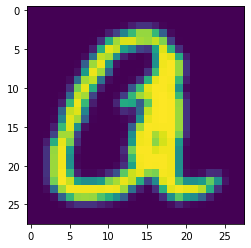

In [61]:
# Your code here
X_low=data[data.e>=36].drop(columns="e")
y_low=data[data.e>=36].e
plt.imshow(data[data.e==36].iloc[0,1:].values.reshape(28,28));


In [63]:
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low,y_low,test_size=0.2)

In [68]:
SVC.fit(X_low_train,y_low_train)
y_low_pred=SVC.predict(X_low_test)
precision_score(y_low_test,y_low_pred,average=None)
recall_score(y_low_test,y_low_pred,average=None)
f1_score(y_low_test,y_low_pred,average=None)
SVC.score(X=X_low_test,y=y_low_test)

0.9116777531411677

In [71]:
DTC.fit(X_low_train,y_low_train)
y_low_pred=DTC.predict(X_low_test)
precision_score(y_low_test,y_low_pred,average=None)
recall_score(y_low_test,y_low_pred,average=None)
f1_score(y_low_test,y_low_pred,average=None)
DTC.score(X=X_low_test,y=y_low_test)

0.7217294900221729

In [73]:
RFC.fit(X_low_train,y_low_train)
y_low_pred=RFC.predict(X_low_test)
precision_score(y_low_test,y_low_pred,average=None)
recall_score(y_low_test,y_low_pred,average=None)
f1_score(y_low_test,y_low_pred,average=None)
RFC.score(X=X_low_test,y=y_low_test)

0.8843311160384331

* Try to do the same thing with numbers.

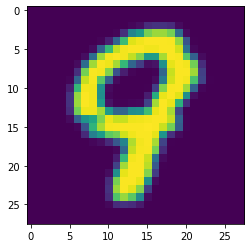

In [74]:
# Your code here

X_num=data[data.e<=9].drop(columns="e")
y_num=data[data.e<=9].e
plt.imshow(data[data.e==9].iloc[0,1:].values.reshape(28,28))

In [75]:
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num,y_num,test_size=0.2)


In [76]:
SVC.fit(X_num_train,y_num_train)
y_num_pred=SVC.predict(X_num_test)
precision_score(y_num_test,y_num_pred,average=None)
recall_score(y_num_test,y_num_pred,average=None)
f1_score(y_num_test,y_num_pred,average=None)
SVC.score(X=X_num_test,y=y_num_test)


0.9834254143646409

In [77]:
DTC.fit(X_num_train,y_num_train)
y_num_pred=DTC.predict(X_num_test)
precision_score(y_num_test,y_num_pred,average=None)
recall_score(y_num_test,y_num_pred,average=None)
DTC.score(X=X_num_test,y=y_num_test)

0.8887258287292817

In [78]:
RFC.fit(X_num_train,y_num_train)
y_num_pred=RFC.predict(X_num_test)
precision_score(y_num_test,y_num_pred,average=None)
recall_score(y_num_test,y_num_pred,average=None)
f1_score(y_num_test,y_num_pred,average=None)
RFC.score(X=X_num_test,y=y_num_test)

0.9736705801104972